In [21]:
import pandas as pd
import numpy as np
import operator

import matplotlib.pyplot as plt
%matplotlib inline

import nltk
from nltk.stem import SnowballStemmer
from nltk.corpus import stopwords
from nltk.tokenize import word_tokenize
from nltk.tokenize import RegexpTokenizer
from nltk.stem import WordNetLemmatizer

from sklearn.feature_extraction.text import CountVectorizer
from sklearn.model_selection import train_test_split
from sklearn.naive_bayes import MultinomialNB

In [17]:
df = pd.read_csv('Spam Email raw text for NLP.csv').drop('FILE_NAME', axis=1)
df

,CATEGORY,MESSAGE
0,1,"Dear Homeowner,\n\n \n\nInterest Rates are at ..."
1,1,ATTENTION: This is a MUST for ALL Computer Use...
2,1,This is a multi-part message in MIME format.\n...
3,1,IMPORTANT INFORMATION:\n\n\n\nThe new domain n...
4,1,This is the bottom line. If you can GIVE AWAY...
...,...,...
5791,0,"I'm one of the 30,000 but it's not working ver..."
5792,0,Damien Morton quoted:\n\n>W3C approves HTML 4 ...
5793,0,"On Mon, 2002-07-22 at 06:50, che wrote:\n\n\n\..."
5794,0,"Once upon a time, Manfred wrote :\n\n\n\n> I w..."


In [76]:
from nltk.tokenize import RegexpTokenizer
tokenizer = RegexpTokenizer(r'[^0-9\s,\.\-\?!:;\(\)\"\"\#\$\%\&\*\/\>\<]+')
words = [' '.join(tokenizer.tokenize(x.lower())) for x in df["MESSAGE"]]
df['clean'] = words
df

,CATEGORY,MESSAGE,clean,clean_v1
0,1,"Dear Homeowner,\n\n \n\nInterest Rates are at ...",dear homeowner interest rates are at their low...,dear homeowner interest rates are at their low...
1,1,ATTENTION: This is a MUST for ALL Computer Use...,attention this is a must for all computer user...,attention this is a must for all computer user...
2,1,This is a multi-part message in MIME format.\n...,this is a multi part message in mime format =_...,this is a multi part message in mime format =_...
3,1,IMPORTANT INFORMATION:\n\n\n\nThe new domain n...,important information the new domain names are...,important information the new domain names are...
4,1,This is the bottom line. If you can GIVE AWAY...,this is the bottom line if you can give away c...,this is the bottom line if you can give away c...
...,...,...,...,...
5791,0,"I'm one of the 30,000 but it's not working ver...",i'm one of the but it's not working very well ...,i'm one of the but it's not working very well ...
5792,0,Damien Morton quoted:\n\n>W3C approves HTML 4 ...,damien morton quoted w c approves html 'emotit...,damien morton quoted w c approves html 'emotit...
5793,0,"On Mon, 2002-07-22 at 06:50, che wrote:\n\n\n\...",on mon at che wrote thats the correct lines to...,on mon at che wrote thats the correct lines to...
5794,0,"Once upon a time, Manfred wrote :\n\n\n\n> I w...",once upon a time manfred wrote i would like to...,once upon a time manfred wrote i would like to...


<AxesSubplot:xlabel='CATEGORY', ylabel='count'>

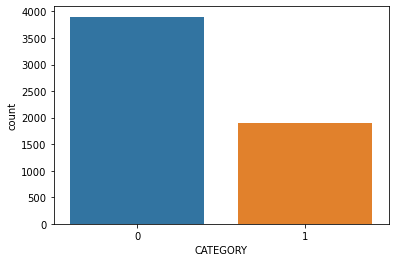

In [39]:
import seaborn as sns
sns.countplot(data=df, x='CATEGORY')

Would Recommend:      0
1  1896
0  3900
Proportion Chance Criterion: 55.98%
1.25 * Proportion Chance Criterion: 69.97%


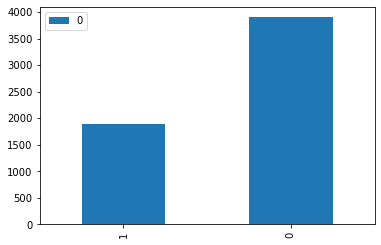

In [41]:
import seaborn as sns
sns.countplot(data=df, x='CATEGORY')

from collections import Counter
state_counts = Counter(df.CATEGORY)
df_state = pd.DataFrame.from_dict(state_counts, orient='index')
df_state.plot(kind='bar')

num=(df_state[0]/df_state[0].sum())**2

print("Would Recommend:{}".format(df_state))

print("Proportion Chance Criterion: {:0.2f}%".format(100*num.sum()))
print("1.25 * Proportion Chance Criterion: {:0.2f}%".format(1.25*100*num.sum()))

In [34]:
vectorizer = CountVectorizer(stop_words='english')
bow = vectorizer.fit_transform(df['clean'])
feature_names = vectorizer.vocabulary_.keys()

In [35]:
bow

<5796x145533 sparse matrix of type '<class 'numpy.int64'>'
	with 728196 stored elements in Compressed Sparse Row format>

In [38]:
df_bow = pd.DataFrame.sparse.from_spmatrix(bow, columns=feature_names)
df_bow

,dear,homeowner,rates,lowest,point,years,help,best,rate,situation,...,neuroscience,muldentalweg,ribbon,campain,bennewitz,interpreters,rockall,funniness,dimv,initialize
0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
5791,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
5792,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
5793,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
5794,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [42]:
X_train, X_test, y_train, y_test = train_test_split(df_bow, df.CATEGORY, test_size=0.25, stratify=df.CATEGORY)

In [43]:
classifier = MultinomialNB()
classifier.fit(X_train, y_train)
train_score = classifier.score(X_train, y_train)
test_score = classifier.score(X_test, y_test)

print('Train Score:', train_score)
print('Test Score:', test_score)

Train Score: 0.9687140556705774
Test Score: 0.9530710835058661


In [ ]:
nltk.download('wordnet')

In [74]:
words = [SnowballStemmer("english").stem(i) for i in df['clean']]
df['clean_v1'] = words

In [77]:
words = [' '.join([WordNetLemmatizer().lemmatize(x) 
                   for x in df["clean_v1"][i].split()]
                   for i in range(df.shape[0]))]
df['clean_v2'] = words
df

TypeError: sequence item 0: expected str instance, list found

In [79]:
df = pd.read_csv('Spam Email raw text for NLP.csv').drop('FILE_NAME', axis=1)

tokenizer = RegexpTokenizer(r'[^0-9\s,\.\-\?!:;\(\)\"\"\#\$\%\&\*\/+><]+')
token = [" ".join(tokenizer.tokenize(x)) for x in df['MESSAGE']]
df['tokenized'] = token

# stemmer
stemmed = [SnowballStemmer('english').stem(x)
              for x in df['tokenized']]
df['stemmed'] = stemmed

# lemmatize    
lemmatized = ([" ".join([WordNetLemmatizer().lemmatize(word)
                         for word in df['stemmed'][i].split()])
               for i in range(df.shape[0])])
df['clean'] = lemmatized
df

,CATEGORY,MESSAGE,tokenized,stemmed,clean
0,1,"Dear Homeowner,\n\n \n\nInterest Rates are at ...",Dear Homeowner Interest Rates are at their low...,dear homeowner interest rates are at their low...,dear homeowner interest rate are at their lowe...
1,1,ATTENTION: This is a MUST for ALL Computer Use...,ATTENTION This is a MUST for ALL Computer User...,attention this is a must for all computer user...,attention this is a must for all computer user...
2,1,This is a multi-part message in MIME format.\n...,This is a multi part message in MIME format =_...,this is a multi part message in mime format =_...,this is a multi part message in mime format =_...
3,1,IMPORTANT INFORMATION:\n\n\n\nThe new domain n...,IMPORTANT INFORMATION The new domain names are...,important information the new domain names are...,important information the new domain name are ...
4,1,This is the bottom line. If you can GIVE AWAY...,This is the bottom line If you can GIVE AWAY C...,this is the bottom line if you can give away c...,this is the bottom line if you can give away c...
...,...,...,...,...,...
5791,0,"I'm one of the 30,000 but it's not working ver...",I'm one of the but it's not working very well ...,i'm one of the but it's not working very well ...,i'm one of the but it's not working very well ...
5792,0,Damien Morton quoted:\n\n>W3C approves HTML 4 ...,Damien Morton quoted W C approves HTML 'emotit...,damien morton quoted w c approves html 'emotit...,damien morton quoted w c approves html 'emotit...
5793,0,"On Mon, 2002-07-22 at 06:50, che wrote:\n\n\n\...",On Mon at che wrote thats the correct lines to...,on mon at che wrote thats the correct lines to...,on mon at che wrote thats the correct line to ...
5794,0,"Once upon a time, Manfred wrote :\n\n\n\n> I w...",Once upon a time Manfred wrote I would like to...,once upon a time manfred wrote i would like to...,once upon a time manfred wrote i would like to...


In [81]:
vectorizer = CountVectorizer(stop_words='english')
bow = vectorizer.fit_transform(df['clean'])
feature_names = vectorizer.vocabulary_.keys()
df_bow = pd.DataFrame.sparse.from_spmatrix(bow, columns=feature_names)
df_bow

,dear,homeowner,rate,lowest,point,year,help,best,situation,matching,...,burkhardt,burk,neuroscience,muldentalweg,campain,bennewitz,rockall,funniness,dimv,initialize
0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
5791,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
5792,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
5793,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
5794,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [82]:
X_train, X_test, y_train, y_test = train_test_split(df_bow, df.CATEGORY, test_size=0.25, stratify=df.CATEGORY)

In [83]:
classifier = MultinomialNB()
classifier.fit(X_train, y_train)
train_score = classifier.score(X_train, y_train)
test_score = classifier.score(X_test, y_test)

print('Train Score:', train_score)
print('Test Score:', test_score)

Train Score: 0.9544513457556936
Test Score: 0.9365079365079365


In [ ]:
Num_trials = 5

all_train_score = []
all_test_score = []
for i in range(Num_trials+1):
    x_train, x_test, y_train, y_test = train_test_split(df_bow, df.CATEGORY, test_size=0.25, random_state=i)
    classifier = MultinomialNB().fit(x_train, y_train)
    all_train_score.append(classifier.score(x_train, y_train))
    all_test_score.append(classifier.score(x_test, y_test))
    
np.mean(all_test_score)

In [84]:
import time
from sklearn.neighbors import KNeighborsClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.svm import LinearSVC
from sklearn.svm import SVC
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.ensemble import RandomForestClassifier

X_train, X_test, y_train, y_test = train_test_split(df_bow, df.CATEGORY, test_size=0.25, stratify=df.CATEGORY)

startTime = time.time()
knn = KNeighborsClassifier()
knn.fit(X_train, y_train)
elapsed_time_knn = time.time() - startTime

startTime = time.time()
LR = LogisticRegression()
LR.fit(X_train, y_train)
elapsed_time_LR = time.time() - startTime

startTime = time.time()
SVC = LinearSVC()
SVC.fit(X_train, y_train)
elapsed_time_SVC = time.time() - startTime

startTime = time.time()
Bayes_multinomial = MultinomialNB()
Bayes_multinomial.fit(X_train, y_train)
elapsed_time_Bayes_multinomial = time.time() - startTime

startTime = time.time()
DT = DecisionTreeClassifier()
DT.fit(X_train, y_train)
elapsed_time_DT = time.time() - startTime

startTime = time.time()
RF = RandomForestClassifier()
RF.fit(X_train, y_train)
elapsed_time_RF = time.time() - startTime

startTime = time.time()
GB = GradientBoostingClassifier()
GB.fit(X_train, y_train)
elapsed_time_GB = time.time() - startTime

startTime = time.time()
y_pred_knn = knn.predict(X_test)
test_time_knn = time.time() - startTime

startTime = time.time()
y_pred_LR = LR.predict(X_test)
test_time_LR = time.time() - startTime

startTime = time.time()
y_pred_SVC = SVC.predict(X_test)
test_time_SVC = time.time() - startTime

startTime = time.time()
y_pred_Bayes_multinomial= Bayes_multinomial.predict(X_test)
test_time_Bayes_multinomial = time.time() - startTime

startTime = time.time()
y_pred_DT= DT.predict(X_test)
test_time_DT = time.time() - startTime

startTime = time.time()
y_pred_RF= RF.predict(X_test)
test_time_RF = time.time() - startTime

startTime = time.time()
y_pred_GB= GB.predict(X_test)
test_time_GB = time.time() - startTime

cols = ['Machine Learning Classification Method','Train Accuracy', 'Test Accuracy', 'Training Time', 'Testing Time']
df2 = pd.DataFrame(columns=cols)

df2.loc[0] = ['kNN', knn.score(X_train, y_train), knn.score(X_test, y_test), elapsed_time_knn, test_time_knn]
df2.loc[1] = ['Logistic Regression', LR.score(X_train, y_train), LR.score(X_test, y_test), elapsed_time_LR,test_time_LR]
df2.loc[2] = ['Linear SVC', SVC.score(X_train, y_train),  SVC.score(X_test, y_test), elapsed_time_SVC,test_time_SVC]
df2.loc[3] = ['Multinomial Naive Bayes', Bayes_multinomial.score(X_train, y_train),  Bayes_multinomial.score(X_test, y_test), elapsed_time_Bayes_multinomial,test_time_Bayes_multinomial]
df2.loc[4] = ['Decision Tree', DT.score(X_train, y_train),  DT.score(X_test, y_test), elapsed_time_DT, test_time_DT]
df2.loc[5] = ['Random Forest Classifier', RF.score(X_train, y_train),  RF.score(X_test, y_test), elapsed_time_RF,test_time_RF]
df2.loc[6] = ['Gradient Boosting Classifier', GB.score(X_train, y_train),  GB.score(X_test, y_test), elapsed_time_GB, test_time_GB]

df2

C:\Users\vince\AppData\Roaming\Python\Python38\site-packages\sklearn\linear_model\_logistic.py:814: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
C:\Users\vince\AppData\Roaming\Python\Python38\site-packages\sklearn\svm\_base.py:1199: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(
C:\Users\vince\AppData\Roaming\Python\Python38\site-packages\sklearn\base.py:441: UserWarning: X does not have valid feature names, but KNeighborsClassifier was fitted with feature names
  warnings.warn(
C:\Users\vince\AppData\Roaming\Python\Python38\site-packages\sklearn\base.

,Machine Learning Classification Method,Train Accuracy,Test Accuracy,Training Time,Testing Time
0,kNN,0.953301,0.918565,12.291327,13.138884
1,Logistic Regression,0.999770,0.991028,5.876070,3.520194
2,Linear SVC,1.000000,0.988958,3.540017,3.363962
3,Multinomial Naive Bayes,0.954451,0.927536,3.420094,3.323257
4,Decision Tree,1.000000,0.951691,5.835696,3.350897
5,Random Forest Classifier,1.000000,0.976536,18.865083,3.650331
6,Gradient Boosting Classifier,0.985047,0.964113,113.052757,3.638737


In [93]:
df = pd.read_csv('spam.csv', encoding="ISO-8859-1")[['v1', 'v2']]
df.columns = ['label', 'message']
label = {'ham':0, 'spam':1}
df['label'] = df['label'].map(label)
df

,label,message
0,0,"Go until jurong point, crazy.. Available only ..."
1,0,Ok lar... Joking wif u oni...
2,1,Free entry in 2 a wkly comp to win FA Cup fina...
3,0,U dun say so early hor... U c already then say...
4,0,"Nah I don't think he goes to usf, he lives aro..."
...,...,...
5567,1,This is the 2nd time we have tried 2 contact u...
5568,0,Will Ì_ b going to esplanade fr home?
5569,0,"Pity, * was in mood for that. So...any other s..."
5570,0,The guy did some bitching but I acted like i'd...


Would Recommend:      0
0  4825
1   747
Proportion Chance Criterion: 76.78%
1.25 * Proportion Chance Criterion: 95.98%


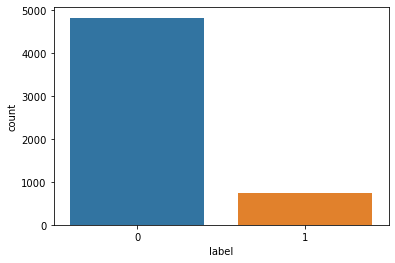

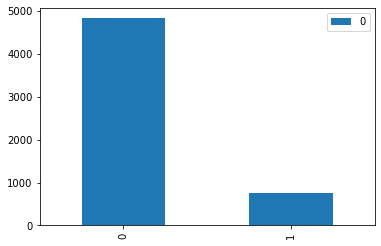

In [90]:
import seaborn as sns
sns.countplot(data=df, x='label')

from collections import Counter
state_counts = Counter(df.label)
df_state = pd.DataFrame.from_dict(state_counts, orient='index')
df_state.plot(kind='bar')

num=(df_state[0]/df_state[0].sum())**2

print("Would Recommend:{}".format(df_state))

print("Proportion Chance Criterion: {:0.2f}%".format(100*num.sum()))
print("1.25 * Proportion Chance Criterion: {:0.2f}%".format(1.25*100*num.sum()))

In [94]:
#tokenize
from nltk.tokenize import RegexpTokenizer
tokenizer = RegexpTokenizer(r'[^0-9\s,\.\-\?!:;\(\)\"\"\#\$\%\&\*\/]+')
words = [' '.join(tokenizer.tokenize(x.lower())) for x in df["message"]]
df['clean'] = words
filtered_words = [SnowballStemmer("english").stem(i) for i in df['clean']]
df['clean'] = filtered_words
df

,label,message,clean
0,0,"Go until jurong point, crazy.. Available only ...",go until jurong point crazy available only in ...
1,0,Ok lar... Joking wif u oni...,ok lar joking wif u oni
2,1,Free entry in 2 a wkly comp to win FA Cup fina...,free entry in a wkly comp to win fa cup final ...
3,0,U dun say so early hor... U c already then say...,u dun say so early hor u c already then say
4,0,"Nah I don't think he goes to usf, he lives aro...",nah i don't think he goes to usf he lives arou...
...,...,...,...
5567,1,This is the 2nd time we have tried 2 contact u...,this is the nd time we have tried contact u u ...
5568,0,Will Ì_ b going to esplanade fr home?,will ì_ b going to esplanade fr hom
5569,0,"Pity, * was in mood for that. So...any other s...",pity was in mood for that so any other suggest
5570,0,The guy did some bitching but I acted like i'd...,the guy did some bitching but i acted like i'd...


In [121]:
df['clean'][1]

'ok lar joking wif u oni'

In [95]:
vectorizer = CountVectorizer(stop_words='english')
bow = vectorizer.fit_transform(df['clean'])
feature_names = vectorizer.vocabulary_.keys()
df_bow = pd.DataFrame.sparse.from_spmatrix(bow, columns=feature_names)
df_bow

,jurong,point,crazy,available,bugis,great,world,la,buffet,cine,...,dental,nmde,dump,heap,lowes,salesman,consid,postcod,pity,bitching
0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
5567,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
5568,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
5569,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
5570,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [104]:
X_train, X_test, y_train, y_test = train_test_split(df_bow, df.label, test_size=0.25, stratify=df.label)

In [103]:

X_train, X_test, y_train, y_test = train_test_split(df_bow, df.label, test_size=0.25, stratify=df.label)

classifier = MultinomialNB()
classifier.fit(X_train, y_train)
train_score = classifier.score(X_train, y_train)
test_score = classifier.score(X_test, y_test)

print('Train Score:', train_score)
print('Test Score:', test_score)

Train Score: 0.992581957406078
Test Score: 0.9755922469490309


In [109]:
classifier.predict(X_test)

array([0, 0, 1, ..., 0, 1, 0], dtype=int64)

In [110]:
y_test

2213    0
2883    0
5       1
1081    0
3501    0
       ..
2938    0
1083    0
5323    0
4758    1
3958    0
Name: label, Length: 1393, dtype: int64

In [124]:
proba = pd.DataFrame(classifier.feature_log_prob_/100, columns=feature_names)
proba

,jurong,point,crazy,available,bugis,great,world,la,buffet,cine,...,dental,nmde,dump,heap,lowes,salesman,consid,postcod,pity,bitching
0,-0.097077,-0.104008,-0.093022,-0.104008,-0.104008,-0.084549,-0.104008,-0.104008,-0.104008,-0.104008,...,-0.097077,-0.079159,-0.097077,-0.104008,-0.104008,-0.104008,-0.104008,-0.104008,-0.086090,-0.097077
1,-0.096334,-0.096334,-0.096334,-0.096334,-0.096334,-0.096334,-0.096334,-0.096334,-0.096334,-0.096334,...,-0.096334,-0.096334,-0.096334,-0.096334,-0.096334,-0.089403,-0.089403,-0.089403,-0.096334,-0.096334


In [137]:
test = df['clean'][1].split()
test

['ok', 'lar', 'joking', 'wif', 'u', 'oni']

In [138]:
test = ['ok', 'lar', 'joking', 'wif', 'oni']

In [135]:
proba['oni']

0   -0.097077
1   -0.096334
Name: oni, dtype: float64

In [142]:
prob_spam = [proba[x][1] for x in test]
prob_ham = [proba[x][0] for x in test]
print(np.sum(prob_spam))
print(np.sum(prob_ham))

-0.4816724457628471
-0.4377130556150988


In [131]:
proba['ok'][0]

-0.09302190025606062

In [119]:
-9.707655 + -10.400802

-20.108457

In [118]:
-9.633449 + -9.633449

-19.266898

In [106]:
Num_trials = 10

all_train_score = []
all_test_score = []

for i in range(Num_trials+1):
    X_train, X_test, y_train, y_test = train_test_split(df_bow, df.label, test_size=0.25, random_state=i,stratify=df.label)
    classifier = MultinomialNB().fit(X_train, y_train)
    all_train_score.append(classifier.score(X_train, y_train))
    all_test_score.append(classifier.score(X_test, y_test))
    
np.max(all_test_score)

0.9813352476669059

In [108]:
np.mean(all_test_score)

0.9756575083208248

In [107]:
import time
from sklearn.neighbors import KNeighborsClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.svm import LinearSVC
from sklearn.svm import SVC
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.ensemble import RandomForestClassifier
from tqdm import tqdm

X_train, X_test, y_train, y_test = train_test_split(df_bow, df.label, test_size=0.25, stratify=df.label)

startTime = time.time()
knn = KNeighborsClassifier()
knn.fit(X_train, y_train)
elapsed_time_knn = time.time() - startTime

startTime = time.time()
LR = LogisticRegression()
LR.fit(X_train, y_train)
elapsed_time_LR = time.time() - startTime

startTime = time.time()
SVC = LinearSVC()
SVC.fit(X_train, y_train)
elapsed_time_SVC = time.time() - startTime

startTime = time.time()
Bayes_multinomial = MultinomialNB()
Bayes_multinomial.fit(X_train, y_train)
elapsed_time_Bayes_multinomial = time.time() - startTime

startTime = time.time()
DT = DecisionTreeClassifier()
DT.fit(X_train, y_train)
elapsed_time_DT = time.time() - startTime

startTime = time.time()
RF = RandomForestClassifier()
RF.fit(X_train, y_train)
elapsed_time_RF = time.time() - startTime

startTime = time.time()
GB = GradientBoostingClassifier()
GB.fit(X_train, y_train)
elapsed_time_GB = time.time() - startTime

startTime = time.time()
y_pred_knn = knn.predict(X_test)
test_time_knn = time.time() - startTime

startTime = time.time()
y_pred_LR = LR.predict(X_test)
test_time_LR = time.time() - startTime

startTime = time.time()
y_pred_SVC = SVC.predict(X_test)
test_time_SVC = time.time() - startTime

startTime = time.time()
y_pred_Bayes_multinomial= Bayes_multinomial.predict(X_test)
test_time_Bayes_multinomial = time.time() - startTime

startTime = time.time()
y_pred_DT= DT.predict(X_test)
test_time_DT = time.time() - startTime

startTime = time.time()
y_pred_RF= RF.predict(X_test)
test_time_RF = time.time() - startTime

startTime = time.time()
y_pred_GB= GB.predict(X_test)
test_time_GB = time.time() - startTime

cols = ['Machine Learning Classification Method','Train Accuracy', 'Test Accuracy', 'Training Time', 'Testing Time']
df2 = pd.DataFrame(columns=cols)

df2.loc[0] = ['kNN', knn.score(X_train, y_train), knn.score(X_test, y_test), elapsed_time_knn, test_time_knn]
df2.loc[1] = ['Logistic Regression', LR.score(X_train, y_train), LR.score(X_test, y_test), elapsed_time_LR,test_time_LR]
df2.loc[2] = ['Linear SVC', SVC.score(X_train, y_train),  SVC.score(X_test, y_test), elapsed_time_SVC,test_time_SVC]
df2.loc[3] = ['Multinomial Naive Bayes', Bayes_multinomial.score(X_train, y_train),  Bayes_multinomial.score(X_test, y_test), elapsed_time_Bayes_multinomial,test_time_Bayes_multinomial]
df2.loc[4] = ['Decision Tree', DT.score(X_train, y_train),  DT.score(X_test, y_test), elapsed_time_DT, test_time_DT]
df2.loc[5] = ['Random Forest Classifier', RF.score(X_train, y_train),  RF.score(X_test, y_test), elapsed_time_RF,test_time_RF]
df2.loc[6] = ['Gradient Boosting Classifier', GB.score(X_train, y_train),  GB.score(X_test, y_test), elapsed_time_GB, test_time_GB]

df2

C:\Users\vince\AppData\Roaming\Python\Python38\site-packages\sklearn\base.py:441: UserWarning: X does not have valid feature names, but KNeighborsClassifier was fitted with feature names
  warnings.warn(
C:\Users\vince\AppData\Roaming\Python\Python38\site-packages\sklearn\base.py:441: UserWarning: X does not have valid feature names, but KNeighborsClassifier was fitted with feature names
  warnings.warn(


,Machine Learning Classification Method,Train Accuracy,Test Accuracy,Training Time,Testing Time
0,kNN,0.936588,0.916009,0.420808,0.597152
1,Logistic Regression,0.995932,0.977746,0.243718,0.202950
2,Linear SVC,1.000000,0.979899,0.212851,0.182842
3,Multinomial Naive Bayes,0.992343,0.977028,0.181593,0.186371
4,Decision Tree,1.000000,0.973439,0.294704,0.172115
5,Random Forest Classifier,1.000000,0.969131,4.532408,0.239730
6,Gradient Boosting Classifier,0.976549,0.964824,3.444710,0.185015
